# Estadistica Aplicada
## Alejandro Hernández Cerda 1903855
### 6ta sesion 13 feb (día del actuario)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
datos = pd.read_excel('modelolineal.xlsx')
datos

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21
5,6,24.436799,22
6,7,14.507928,19
7,8,16.013496,14
8,9,12.043514,3
9,10,6.808838,1


In [4]:
datos.head()

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21


In [5]:
datos.shape

(30, 3)

In [6]:
datos.describe()

,observación,Y,X
count,30.000000,30.000000,30.000000
mean,15.500000,19.038965,17.333333
std,8.803408,5.689742,8.372094
min,1.000000,6.808838,0.000000
25%,8.250000,14.128834,12.250000
50%,15.500000,19.937977,19.000000
75%,22.750000,24.151130,23.000000
max,30.000000,28.422786,29.000000


## Todo gráfico debe tener:

(0.0, 30.0)

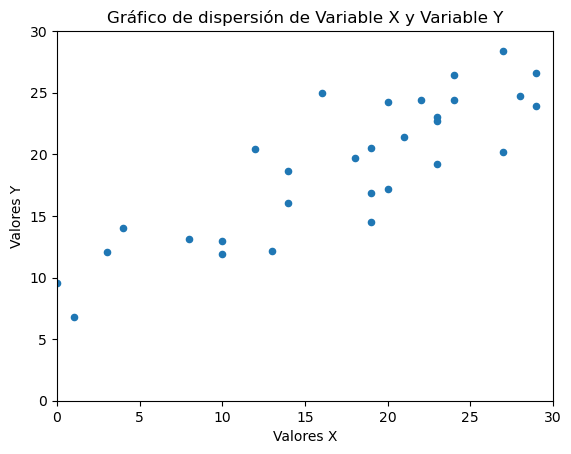

In [7]:
datos.plot.scatter('X','Y')
plt.title('Gráfico de dispersión de Variable X y Variable Y')
plt.xlabel('Valores X')
plt.ylabel('Valores Y')
#Limitar los ejes
plt.xlim(0,30)
plt.ylim(0,30)

Vamos a estimar el modelo $Y=\beta_0 + \beta_1 X$

In [11]:
reg = smf.ols(formula='Y~X',data=datos)
resultado=reg.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.72e-09
Time:                        14:41:51   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

El coeficiente estimado para $\beta_0$ es 7.022, El p value es $0.00<.05$ lo que significa que rechazamos $H_0$, el intercepto es distintio de 0

El coeficiente estimado para $\beta_1$ es 8.740. El p value es $0.00<.05$ lo que significa que rechazamos $H_0$ con 95% de confianza.

Si una relacion lineal entre 'X' y 'Y' 

En promedio, cuando X aumenta en 1 unidad, Y aumenta en .58

In [18]:
datos['X2']=datos['X']**2

In [19]:
datos.head()

,observación,Y,X,X2
0,1,19.246957,23,529
1,2,16.878501,19,361
2,3,20.187237,27,729
3,4,12.176789,13,169
4,5,21.420112,21,441


In [20]:
reg2= smf.ols(formula='Y~X+X2',data=datos)
resultado2=reg2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.92e-08
Time:                        15:02:20   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

El coeficiente estimado para $\beta_0$ es 4.945, El p value es $0.00<.05$ lo que significa que rechazamos $H_0$, el intercepto es distintio de 0

El coeficiente estimado para $\beta_1$ es 2.408. El p value es $0.023<.05$ lo que significa que rechazamos $H_0$ con 95% de confianza.

El coeficiente estimado para $\beta_2$ es -.089. El p value es $0.929>.05$ lo que significa que rechazamos $H_0$ con 95% de confianza.

No hay una relacion lineal entre 'X', 'X2' , 'Y' 

En promedio, cuando X aumenta en 1 unidad, Y aumenta en .58

**MAPE: Error Porcentual
MAD: Desviación Absoluta Media  (Mean Absolute Deviation)
MSD: Desviación Cuadrpatica Media (Mean Square Deviaton)**

In [22]:
datos.head()

,observación,Y,X,X2
0,1,19.246957,23,529
1,2,16.878501,19,361
2,3,20.187237,27,729
3,4,12.176789,13,169
4,5,21.420112,21,441


In [23]:
# vamos a generar el pronóstico de y
datos['Y_hat']=resultado2.predict(datos)

In [24]:
datos.head()

,observación,Y,X,X2,Y_hat
0,1,19.246957,23,529,22.340436
1,2,16.878501,19,361,20.049010
2,3,20.187237,27,729,24.608946
3,4,12.176789,13,169,16.568905
4,5,21.420112,21,441,21.197588


In [25]:
from sklearn.metrics import mean_absolute_error as mad

In [26]:
#mad(y original,y pronosticada)
mad(datos['Y'],datos['Y_hat'])

2.3553110792438807